In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [20]:
colors=['#264b96','#bf212f','#006f3c']
sns.set_theme(style='whitegrid')
sns.set_palette(sns.color_palette(colors))

## DRD3

In [11]:
size = len(np.load('../data/DRD3/amines.npy'))*len(np.load('../data/DRD3/acids.npy'))

In [12]:
batch_idxs = np.array([np.load(f'../DRD3_full_mlp_0.0025_0.01_greedy/{i}_batch_idxs.npy') for i in range(6)], dtype=object)

In [13]:
df = pd.DataFrame()
for q in [0.6, 0.7, 0.8, 0.9]:
    hits_idxs = np.load(f'../data/DRD3/hits_idxs_q_{q}.npy')
    percent_explored = 100 * np.vectorize(lambda x: len(x))(batch_idxs).cumsum() / size 
    hits_found = 100 * np.vectorize(lambda x: len(np.intersect1d(x, hits_idxs)))(batch_idxs).cumsum() / len(hits_idxs)

    df_ = pd.DataFrame({'percent_explored': percent_explored, 'hits_found': hits_found})
    df_['q'] = q
    df_['model'] = 'MLP'

    df = pd.concat([df, df_])

In [18]:
df

,percent_explored,hits_found,q,model
0,0.25,0.250157,0.6,MLP
1,1.25,15.689523,0.6,MLP
2,2.25,40.435240,0.6,MLP
3,3.25,55.018074,0.6,MLP
4,4.25,64.160976,0.6,MLP
5,5.00,69.360834,0.6,MLP
0,0.25,0.245501,0.7,MLP
1,1.25,27.143905,0.7,MLP
2,2.25,65.180270,0.7,MLP
3,3.25,78.950606,0.7,MLP


In [8]:
plot = sns.relplot(
    data=df,
    x='percent_explored',
    y='hits_found',
    col='q',
    kind='line',
    legend=True,
    hue='model',
    height=6,
    aspect=0.7
)
plot.axes[0,0].plot([0,5],[0,5], color='grey', label='random')
handles, labels = plot.axes[0,0].get_legend_handles_labels()
plt.close()

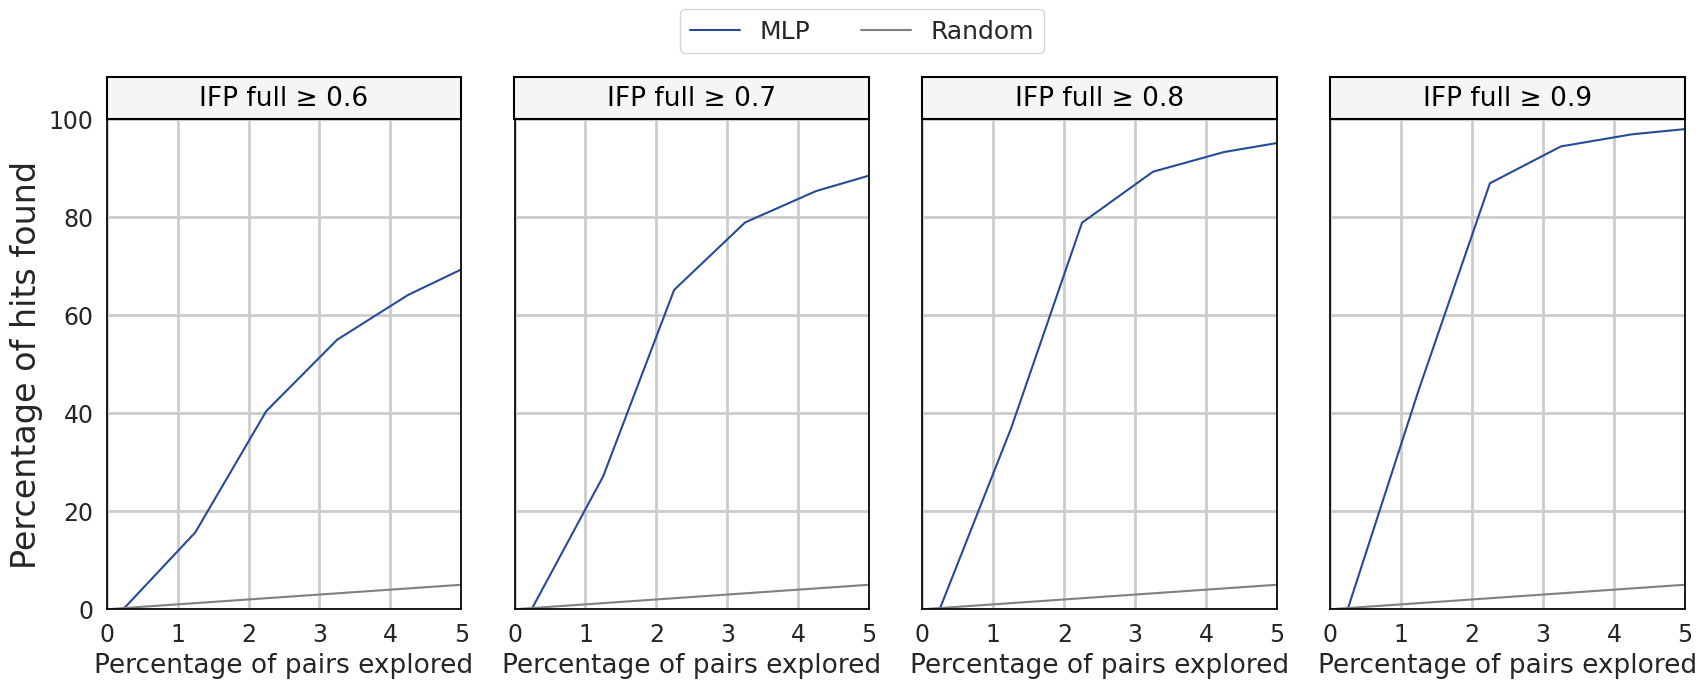

In [17]:
plot = sns.relplot(
    data=df,
    x='percent_explored',
    y='hits_found',
    col='q',
    kind='line',
    hue='model',
    legend=False,
    height=6,
    aspect=0.7
)
plt.xlim([0, 5])
plt.ylim([0, 100])

sides = ['top', 'bottom', 'right', 'left']
qs = ['IFP full ≥ 0.6', 'IFP full ≥ 0.7', 'IFP full ≥ 0.8', 'IFP full ≥ 0.9']
for i, ax in enumerate(plot.axes.flat):
    ax.plot([0,5],[0,5], color='grey', label='random')
    ax.tick_params(axis='both', which='both', labelsize=17)
    ax.grid(linewidth=2)
    
    title = ax.set_title(f'{qs[i]}', fontsize=19, position=(0.5, 3.70),
             backgroundcolor='white', color='black',
             verticalalignment="bottom", horizontalalignment="center", bbox=dict(edgecolor='black', linewidth=1.5, facecolor='whitesmoke'))
    title._bbox_patch._mutation_aspect = 0.088
    title.get_bbox_patch().set_boxstyle("square", pad=3.52)

    for side in sides:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_linestyle('-')
        ax.spines[side].set_color('black')
    plot.set_ylabels("Percentage of hits found", fontsize=24)
    plot.set_xlabels("Percentage of pairs explored", fontsize=19)
    plt.subplots_adjust(wspace=0.15)
    labels = ['MLP', 'Random']
plot.axes[0,2].legend(handles, labels, loc='upper center', bbox_to_anchor=(-0.17, 1.25), ncol=9, fontsize=18)
#plt.savefig('/projects/ML-SpaceDock/pictures/CACHE4_full_mlp.png', dpi=300, bbox_inches='tight')
# plt.show()

## CBLB

In [22]:
size = 6639561469

In [23]:
batch_idxs = np.array([np.load(f'../CACHE4_full_mlp_0.0025_0.01_greedy/{i}_batch_idxs.npy') for i in range(6)], dtype=object)

In [24]:
df = pd.DataFrame()
for q in [0.6, 0.7, 0.8, 0.9]:
    hits_idxs = np.load(f'../CACHE4_full_mlp_0.0025_0.01_greedy/hits_idxs_q_{q}.npy')
    percent_explored = 100 * np.vectorize(lambda x: len(x))(batch_idxs).cumsum() / size 
    hits_found = 100 * np.vectorize(lambda x: len(np.intersect1d(x, hits_idxs)))(batch_idxs).cumsum() / len(hits_idxs)

    df_ = pd.DataFrame({'percent_explored': percent_explored, 'hits_found': hits_found})
    df_['q'] = q
    df_['model'] = 'MLP'

    df = pd.concat([df, df_])

In [25]:
df

,percent_explored,hits_found,q,model
0,0.25,0.246649,0.6,MLP
1,1.25,20.046279,0.6,MLP
2,2.25,46.030044,0.6,MLP
3,3.25,60.616335,0.6,MLP
4,4.25,69.592837,0.6,MLP
5,5.00,73.727861,0.6,MLP
0,0.25,0.249201,0.7,MLP
1,1.25,25.257418,0.7,MLP
2,2.25,52.463109,0.7,MLP
3,3.25,65.577115,0.7,MLP


In [26]:
plot = sns.relplot(
    data=df,
    x='percent_explored',
    y='hits_found',
    col='q',
    kind='line',
    legend=True,
    hue='model',
    height=6,
    aspect=0.7
)
plot.axes[0,0].plot([0,5],[0,5], color='grey', label='random')
handles, labels = plot.axes[0,0].get_legend_handles_labels()
plt.close()

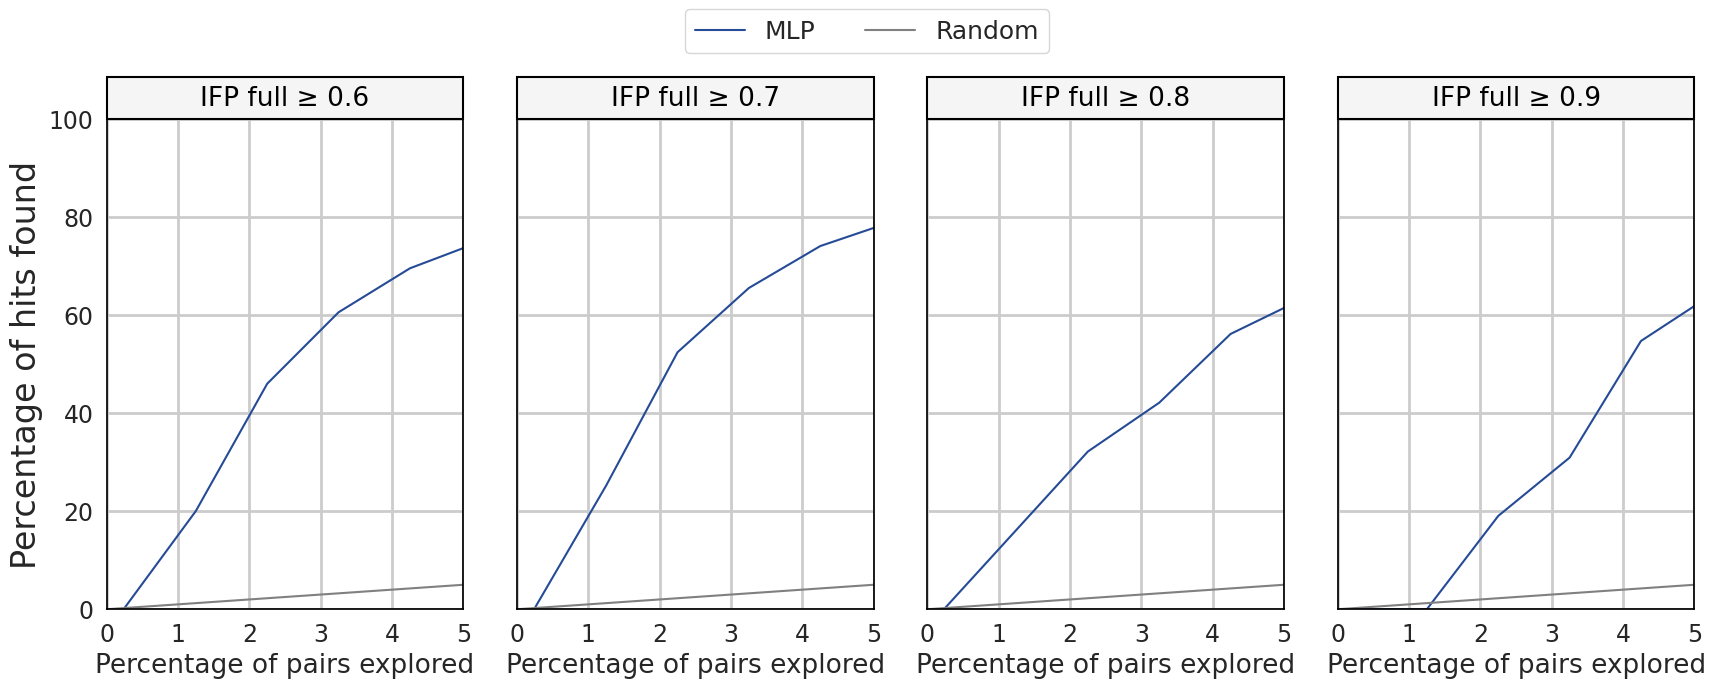

In [28]:
plot = sns.relplot(
    data=df,
    x='percent_explored',
    y='hits_found',
    col='q',
    kind='line',
    hue='model',
    legend=False,
    height=6,
    aspect=0.7
)
plt.xlim([0, 5])
plt.ylim([0, 100])

sides = ['top', 'bottom', 'right', 'left']
qs = ['IFP full ≥ 0.6', 'IFP full ≥ 0.7', 'IFP full ≥ 0.8', 'IFP full ≥ 0.9']
for i, ax in enumerate(plot.axes.flat):
    ax.plot([0,5],[0,5], color='grey', label='random')
    ax.tick_params(axis='both', which='both', labelsize=17)
    ax.grid(linewidth=2)
    
    title = ax.set_title(f'{qs[i]}', fontsize=19, position=(0.5, 3.70),
             backgroundcolor='white', color='black',
             verticalalignment="bottom", horizontalalignment="center", bbox=dict(edgecolor='black', linewidth=1.5, facecolor='whitesmoke'))
    title._bbox_patch._mutation_aspect = 0.088
    title.get_bbox_patch().set_boxstyle("square", pad=3.55)

    for side in sides:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_linestyle('-')
        ax.spines[side].set_color('black')
    plot.set_ylabels("Percentage of hits found", fontsize=24)
    plot.set_xlabels("Percentage of pairs explored", fontsize=19)
    plt.subplots_adjust(wspace=0.15)
    labels = ['MLP', 'Random']
plot.axes[0,2].legend(handles, labels, loc='upper center', bbox_to_anchor=(-0.17, 1.25), ncol=9, fontsize=18)
#plt.savefig('/projects/ML-SpaceDock/pictures/CACHE4_full_mlp.png', dpi=300, bbox_inches='tight')
# plt.show()